# Market Basket Analysis

This is my market basket analysis project on a Indian E-Commerce dataset. This project identifies hidden trends in customer purchasing behavior by analyzing what products are frequently bought together in a E-Commerce's transaction. Market basket analysis is one of the data analysis techniques that aims to identify frequently occurring itemsets or combinations of products to understand customer buying habits.

You can get the dataset also on [Kaggle E-Commerce Dataset](https://www.kaggle.com/datasets/benroshan/ecommerce-data)!

In [50]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

## Load Dataset

In [51]:
df = pd.read_csv('Dataset/Order Details.csv')
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [53]:
df.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.000000,1500.000000
mean,287.668000,15.970000,3.743333
std,461.050488,169.140565,2.184942
min,4.000000,-1981.000000,1.000000
25%,45.000000,-9.250000,2.000000
50%,118.000000,9.000000,3.000000
75%,322.000000,38.000000,5.000000
max,5729.000000,1698.000000,14.000000


In [54]:
df['Sub-Category'].value_counts()

Sub-Category
Saree               210
Hankerchief         198
Stole               192
Phones               83
Bookcases            79
Electronic Games     79
T-shirt              77
Printers             74
Chairs               74
Furnishings          73
Accessories          72
Shirt                69
Skirt                64
Leggings             53
Kurti                47
Trousers             39
Tables               17
Name: count, dtype: int64

## Create Basket (Data Preparation)

In [55]:
basket_df = df.groupby('Order ID')['Sub-Category'].agg(set).reset_index()
basket_df['Sub-Category'] = basket_df['Sub-Category'].apply(lambda x: '|'.join(x))
basket_df = basket_df['Sub-Category'].str.get_dummies('|').astype('bool')
basket_df

,Accessories,Bookcases,Chairs,Electronic Games,Furnishings,Hankerchief,Kurti,Leggings,Phones,Printers,Saree,Shirt,Skirt,Stole,T-shirt,Tables,Trousers
0,False,True,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,True,False,False,False,False,False,False,True,True,False,True,True,False,False,False,False,True
496,False,False,True,True,False,True,False,True,False,True,False,False,False,False,False,False,False
497,True,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False
498,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True


## Create Frequent Itemsets

In this step, we will employ the Apriori Algorithm to identify frequent itemsets with a minimum support threshold of 3%. But, what is support?

In market basket analysis, support refers to the frequency of an itemset (a group of items) appearing together in transactions. It tells us how common a spesific combination of items is purchased. This is the formula to calculate the support value for items X and Y in the N number of transactions:

![alt text](image.png)

Support is typically calculated as the ratio of the number of transsactions containing the itemset to the total number of transactions. Higher support value indicates that the itemset is purchased together more frequently. For example, a support of 0.032 (3.2%) for Kurti and Stole suggest that 3.2% of all transaction contain these items

In [56]:
frequent_itemsets = apriori(basket_df,min_support=0.03,use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)
frequent_itemsets

,support,itemsets
0,0.314,(Stole)
1,0.312,(Saree)
2,0.276,(Hankerchief)
3,0.146,(Electronic Games)
4,0.144,(Bookcases)
...,...,...
66,0.032,"(Printers, Phones)"
67,0.032,"(Kurti, Stole)"
68,0.030,"(Bookcases, T-shirt)"
69,0.030,"(Saree, Trousers)"


## Generate Association Rules

Following the identification of frequent itemsets, the next step involves generating association rules based on these frequent itemsets. These are the steps of generating association rules:
1. Choose a frequent itemset (I) from the previously identified frequent itemsets we've got before
2. Find the non-empty subset (S) from the chosen frequent itemset
3. For each non-empty subset S of I, the association rules is:
    ```
    S -> (I - S)
    ```
    This association rule is valid only if its confindence is greater than or equal to a minimum confidence threshold.

In market basket analysis, confidence refers to the strength of the association between items in an association rule. It tells us how likely it is that customer will buy the second item (consequents) in the rule, given that they already purchased the first item (antacedents). A higher confidence value indicates a stronger association. For example, a confidence of 50% for the rule Skirt -> Saree suggest that 50% of the time people buy Skirt, they also buy Saree in the same transaction. This is the formula to calculate the confidence value for rule X -> Y:

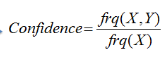

In this case, I will set the minimum confidence threshold to 0.5 (50%) 

In [57]:
product_assosiation = association_rules(frequent_itemsets,metric='confidence',min_threshold=.5).sort_values(['confidence']).reset_index(drop=True)
product_assosiation

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Skirt),(Saree),0.112,0.312,0.056,0.500000,1.602564,0.021056,1.376000,0.423423
1,"(Hankerchief, Saree)",(Stole),0.092,0.314,0.046,0.500000,1.592357,0.017112,1.372000,0.409692
2,"(Printers, Stole)",(Hankerchief),0.058,0.276,0.030,0.517241,1.874063,0.013992,1.499714,0.495117
3,"(Accessories, Saree)",(Stole),0.062,0.314,0.034,0.548387,1.746456,0.014532,1.519000,0.455663
4,"(Hankerchief, Electronic Games)",(Stole),0.058,0.314,0.032,0.551724,1.757083,0.013788,1.530308,0.457404
5,"(Printers, Stole)",(Saree),0.058,0.312,0.034,0.586207,1.878868,0.015904,1.662667,0.496566
6,"(Electronic Games, Stole)",(Hankerchief),0.054,0.276,0.032,0.592593,2.147075,0.017096,1.777091,0.564746
7,"(Printers, Hankerchief)",(Stole),0.048,0.314,0.030,0.625000,1.990446,0.014928,1.829333,0.522689
8,"(Printers, Saree)",(Stole),0.054,0.314,0.034,0.629630,2.005190,0.017044,1.852200,0.529909
9,"(Accessories, Stole)",(Saree),0.054,0.312,0.034,0.629630,2.018044,0.017152,1.857600,0.533267
